## Data Cleaning:  LDS Missionary Database

Data gathered from https://history.churchofjesuschrist.org/chd/search?tabFacet=people&tabSubfacet=missionaries&lang=eng
* Filtering for missionaries (~46,942 pages currently listed)
* Features extracted:  missionary name, mission name, departure year, mission type, missionary residence before departure)
* Missionary name may show up mulitple times (once per mission served)



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data and Remove Duplicates

The web scraper was run in stages, so the data set is spread across multiple files. We will first read in all files and combine them into a single data frame:
* All files use the same headers, so we can employ `df.concat`
* Special encoding used to match the CSV file 


In [2]:
df = pd.read_csv("../data_collection/mission_info_new2.csv", encoding="ISO-8859-1")
    
df.head()

,name,birth_place,mission,loc_served,year,type,residence,url
0,Lyman Palmer Pinkston,"Salt Lake City, Salt Lake, Utah",Central States Mission,Central States,1931,Proselytizing,"Glendale, California",https://history.churchofjesuschrist.org/chd/in...
1,Nelson Daniel Russ,"Alabama, Genesee, New York",Eastern States Mission,Eastern States,1898,Proselytizing,"Wilford, Fremont, Idaho, United States",https://history.churchofjesuschrist.org/chd/in...
2,Preston Baxter Maughan,"Wellsville, Cache, Utah",Northwestern States (Pacific) Mission,Northwestern States,1919,NaN,"Wellsville, Cache, Utah, United States",https://history.churchofjesuschrist.org/chd/in...
3,Joseph Ezra Wood,"Holden, Millard, Utah",British Mission,British,1912,NaN,"Holden, Millard, Utah, United States",https://history.churchofjesuschrist.org/chd/in...
4,Jens Wilhelm Olsen,"Asnas, Oshered, Denmark",Danish Mission,Danish,1935,NaN,United States,https://history.churchofjesuschrist.org/chd/in...


### Dealing with Missing Values

First we might want to see a distribution of missionary departures by year. We can start by converting years to integer types:

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53411 entries, 0 to 53410
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         53411 non-null  object
 1   birth_place  53179 non-null  object
 2   mission      53411 non-null  object
 3   loc_served   46698 non-null  object
 4   year         53411 non-null  int64 
 5   type         35153 non-null  object
 6   residence    51171 non-null  object
 7   url          53411 non-null  object
dtypes: int64(1), object(7)
memory usage: 3.3+ MB


In [3]:
df["year"] = df["year"].apply(lambda x:  int(x))

Oof, it looks like some entries in the `year` column aren't actually numeric. Let's print out the ones that aren't numeric to see what's going on:

In [5]:
def is_int(x):
    try:
        int(x)
        return True
    except ValueError:
        return False

for i in range(len(df)):
    if not is_int(df.iloc[i].year):
        print(i, df.iloc[i]['name'], df.iloc[i].year)
    

The good news is that only a few entries have non-integer values. We could look up the missionaries online to see if there was a problem in data extraction. But since these are only a few out of over 50,000 entries, we can safely ignore them for our distribution plot:

In [6]:
filter_col = df["year"].apply(is_int)

years_filter = df[filter_col]

print(len(years_filter))


53411


In [7]:
# convert data types now
years_filter["year"] = years_filter["year"].apply(lambda x:  int(x))

print(years_filter["year"].min(), years_filter["year"].max())

1830 1994


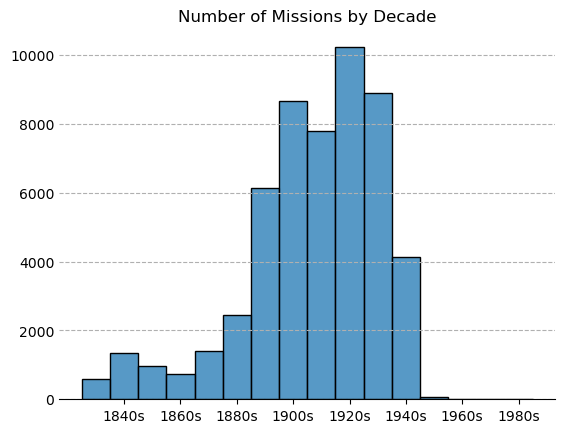

In [17]:
### Create distribution plot
fig, ax = plt.subplots()
sns.histplot(years_filter["year"], bins=range(1830, 2000, 10), ax = ax)

ax.spines[["left", "top", "right"]].set_visible(False)

ax.set_xlabel("")
ax.set_ylabel("")

ax.tick_params(axis="y", length = 0)
ax.grid(axis="y", linestyle ="--")

ax.set_title("Number of Missions by Decade")

xticks = list(range(1845, 1986, 20))
xlabels = [str(i)+"s" for i in range(1840, 1981, 20)]

ax.set_xticks(xticks, labels=xlabels)

plt.show()

In [18]:
### filter by year

years_trim = df[df["year"] >= 1850]
years_trim = years_trim[years_trim["year"] <= 1940]

print(len(years_trim))

48349


In [21]:
years_trim.to_csv("missions_1850_to_1940.csv", index = False)